- 시간대 나눠서 데이터 나누기
- clustering 하기
- train / test 나누기
- 모델링하기

In [1]:
import os

os.chdir('C:/Users/EunJin/Desktop/논문 데이터')
os.getcwd()

'C:\\Users\\EunJin\\Desktop\\논문 데이터'

In [2]:
import pandas as pd

car_jg = pd.read_pickle('car_jg.pkl')

In [3]:
pd.set_option('display.max_columns', 500)
car_jg.head(10)

,date,days,road_name,link_id,start_point,end_point,direction,road_length,road_num,road_type,urban_suburb,district,time,y,cctv,kids,speed_limit,entrance,signal,d1,d2,d3,d4,victims,severity,accident_count,inter_num,temperature,wind,rain,snow,holiday,special,vacation,SO2,CO,O3,NO2,PM10,PM2.5,dust_PM10_level,dust_PM2_level,rain_level,wind_level,O3_level,temp_level,weekend,month
0,20180101,월,금호로,1010006200,청구역,광희문,상행,660,1.0,보조간선도로,외곽,중구,6,25.00,1.0,0.0,40.0,37.0,52.0,1.0,10.0,20.0,6.0,37.0,108.0,28.0,5.0,-3.9,2.0,0.0,0.0,1,0,0,0.004,0.5,0.012,0.027,29.0,17.0,0,1,0,0,0,1,0,1
1,20180101,월,금호로,1010006100,광희문,청구역,하행,674,1.0,보조간선도로,외곽,중구,6,27.00,1.0,0.0,40.0,37.0,52.0,1.0,10.0,20.0,6.0,37.0,108.0,28.0,5.0,-3.9,2.0,0.0,0.0,1,0,0,0.004,0.5,0.012,0.027,29.0,17.0,0,1,0,0,0,1,0,1
2,20180101,월,금호로,1030014900,청구역,신금호역,하행,1083,2.0,보조간선도로,외곽,중구,6,26.74,2.0,0.0,40.0,37.0,52.0,1.0,10.0,20.0,6.0,37.0,108.0,28.0,5.0,-3.9,2.0,0.0,0.0,1,0,0,0.004,0.5,0.012,0.027,29.0,17.0,0,1,0,0,0,1,0,1
3,20180101,월,남대문로,1010016900,광교,을지로1가,상행,313,5.0,보조간선도로,도심권,중구,6,30.82,1.0,0.0,60.0,14.0,10.0,0.0,14.0,34.0,13.0,61.0,157.0,42.0,4.0,-3.9,2.0,0.0,0.0,1,0,0,0.004,0.5,0.012,0.027,29.0,17.0,0,1,0,0,0,1,0,1
4,20180101,월,남대문로,1010011300,을지로1가,명동입구,상행,270,4.0,보조간선도로,도심권,중구,6,35.28,1.0,0.0,60.0,14.0,10.0,0.0,14.0,34.0,13.0,61.0,157.0,42.0,4.0,-3.9,2.0,0.0,0.0,1,0,0,0.004,0.5,0.012,0.027,29.0,17.0,0,1,0,0,0,1,0,1
5,20180101,월,남대문로,1010007100,명동입구,한국은행앞,상행,205,5.0,보조간선도로,도심권,중구,6,28.92,0.0,0.0,60.0,14.0,10.0,0.0,14.0,34.0,13.0,61.0,157.0,42.0,4.0,-3.9,2.0,0.0,0.0,1,0,0,0.004,0.5,0.012,0.027,29.0,17.0,0,1,0,0,0,1,0,1
6,20180101,월,남대문로,1010005100,한국은행앞,숭례문,상행,533,3.0,보조간선도로,도심권,중구,6,30.46,1.0,0.0,60.0,14.0,10.0,0.0,14.0,34.0,13.0,61.0,157.0,42.0,4.0,-3.9,2.0,0.0,0.0,1,0,0,0.004,0.5,0.012,0.027,29.0,17.0,0,1,0,0,0,1,0,1
7,20180101,월,남대문로,1010005200,숭례문,한국은행앞,하행,544,4.0,보조간선도로,도심권,중구,6,27.43,1.0,0.0,60.0,14.0,10.0,0.0,14.0,34.0,13.0,61.0,157.0,42.0,4.0,-3.9,2.0,0.0,0.0,1,0,0,0.004,0.5,0.012,0.027,29.0,17.0,0,1,0,0,0,1,0,1
8,20180101,월,남대문로,1010007200,한국은행앞,명동입구,하행,208,4.0,보조간선도로,도심권,중구,6,37.05,0.0,0.0,60.0,14.0,10.0,0.0,14.0,34.0,13.0,61.0,157.0,42.0,4.0,-3.9,2.0,0.0,0.0,1,0,0,0.004,0.5,0.012,0.027,29.0,17.0,0,1,0,0,0,1,0,1
9,20180101,월,남대문로,1010011400,명동입구,을지로1가,하행,271,4.0,보조간선도로,도심권,중구,6,25.46,1.0,0.0,60.0,14.0,10.0,0.0,14.0,34.0,13.0,61.0,157.0,42.0,4.0,-3.9,2.0,0.0,0.0,1,0,0,0.004,0.5,0.012,0.027,29.0,17.0,0,1,0,0,0,1,0,1


In [4]:
#시간대 10시부터 데이터 car_df1
#전체 시간대 데이터 car_df2

car_df2 = car_jg
car_df1 = car_jg[car_jg['time'].isin([10,11,12,13,14,15,16,17,18,19,20,21,22,23])]


In [5]:
len(car_jg)

1232205

In [6]:
len(car_df2)

1232205

In [7]:
len(car_df1)

958080

### 변수 라벨인코딩

In [8]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
car_jg["direction"] = lb_make.fit_transform(car_jg["direction"])
car_jg["urban_suburb"] = lb_make.fit_transform(car_jg["urban_suburb"])
car_jg["road_type"] = lb_make.fit_transform(car_jg["road_type"])

In [9]:
lb_make.inverse_transform([0,1,2])

array(['기타도로', '보조간선도로', '주간선도로'], dtype=object)

In [10]:
car_jg.head(20)

,date,days,road_name,link_id,start_point,end_point,direction,road_length,road_num,road_type,urban_suburb,district,time,y,cctv,kids,speed_limit,entrance,signal,d1,d2,d3,d4,victims,severity,accident_count,inter_num,temperature,wind,rain,snow,holiday,special,vacation,SO2,CO,O3,NO2,PM10,PM2.5,dust_PM10_level,dust_PM2_level,rain_level,wind_level,O3_level,temp_level,weekend,month
0,20180101,월,금호로,1010006200,청구역,광희문,0,660,1.0,1,1,중구,6,25.00,1.0,0.0,40.0,37.0,52.0,1.0,10.0,20.0,6.0,37.0,108.0,28.0,5.0,-3.9,2.0,0.0,0.0,1,0,0,0.004,0.5,0.012,0.027,29.0,17.0,0,1,0,0,0,1,0,1
1,20180101,월,금호로,1010006100,광희문,청구역,1,674,1.0,1,1,중구,6,27.00,1.0,0.0,40.0,37.0,52.0,1.0,10.0,20.0,6.0,37.0,108.0,28.0,5.0,-3.9,2.0,0.0,0.0,1,0,0,0.004,0.5,0.012,0.027,29.0,17.0,0,1,0,0,0,1,0,1
2,20180101,월,금호로,1030014900,청구역,신금호역,1,1083,2.0,1,1,중구,6,26.74,2.0,0.0,40.0,37.0,52.0,1.0,10.0,20.0,6.0,37.0,108.0,28.0,5.0,-3.9,2.0,0.0,0.0,1,0,0,0.004,0.5,0.012,0.027,29.0,17.0,0,1,0,0,0,1,0,1
3,20180101,월,남대문로,1010016900,광교,을지로1가,0,313,5.0,1,0,중구,6,30.82,1.0,0.0,60.0,14.0,10.0,0.0,14.0,34.0,13.0,61.0,157.0,42.0,4.0,-3.9,2.0,0.0,0.0,1,0,0,0.004,0.5,0.012,0.027,29.0,17.0,0,1,0,0,0,1,0,1
4,20180101,월,남대문로,1010011300,을지로1가,명동입구,0,270,4.0,1,0,중구,6,35.28,1.0,0.0,60.0,14.0,10.0,0.0,14.0,34.0,13.0,61.0,157.0,42.0,4.0,-3.9,2.0,0.0,0.0,1,0,0,0.004,0.5,0.012,0.027,29.0,17.0,0,1,0,0,0,1,0,1
5,20180101,월,남대문로,1010007100,명동입구,한국은행앞,0,205,5.0,1,0,중구,6,28.92,0.0,0.0,60.0,14.0,10.0,0.0,14.0,34.0,13.0,61.0,157.0,42.0,4.0,-3.9,2.0,0.0,0.0,1,0,0,0.004,0.5,0.012,0.027,29.0,17.0,0,1,0,0,0,1,0,1
6,20180101,월,남대문로,1010005100,한국은행앞,숭례문,0,533,3.0,1,0,중구,6,30.46,1.0,0.0,60.0,14.0,10.0,0.0,14.0,34.0,13.0,61.0,157.0,42.0,4.0,-3.9,2.0,0.0,0.0,1,0,0,0.004,0.5,0.012,0.027,29.0,17.0,0,1,0,0,0,1,0,1
7,20180101,월,남대문로,1010005200,숭례문,한국은행앞,1,544,4.0,1,0,중구,6,27.43,1.0,0.0,60.0,14.0,10.0,0.0,14.0,34.0,13.0,61.0,157.0,42.0,4.0,-3.9,2.0,0.0,0.0,1,0,0,0.004,0.5,0.012,0.027,29.0,17.0,0,1,0,0,0,1,0,1
8,20180101,월,남대문로,1010007200,한국은행앞,명동입구,1,208,4.0,1,0,중구,6,37.05,0.0,0.0,60.0,14.0,10.0,0.0,14.0,34.0,13.0,61.0,157.0,42.0,4.0,-3.9,2.0,0.0,0.0,1,0,0,0.004,0.5,0.012,0.027,29.0,17.0,0,1,0,0,0,1,0,1
9,20180101,월,남대문로,1010011400,명동입구,을지로1가,1,271,4.0,1,0,중구,6,25.46,1.0,0.0,60.0,14.0,10.0,0.0,14.0,34.0,13.0,61.0,157.0,42.0,4.0,-3.9,2.0,0.0,0.0,1,0,0,0.004,0.5,0.012,0.027,29.0,17.0,0,1,0,0,0,1,0,1


In [11]:
#시간대 10시부터 데이터 car_df1
#전체 시간대 데이터 car_df2

car_df2 = car_jg
car_df1 = car_jg[car_jg['time'].isin([10,11,12,13,14,15,16,17,18,19,20,21,22,23])]

## 우선 car_df1(10시부터) 데이터 클러스터링하기

In [38]:
cluster_car_jg = car_df1.drop_duplicates('link_id',keep='first')
cluster_car_jg = cluster_car_jg[['link_id','road_name','direction', 'road_length', 'road_num', 'road_type', 'urban_suburb', 'cctv', 'kids', 'speed_limit', 'entrance', 'signal']]

In [13]:
len(cluster_car_jg)

205

In [39]:
cluster_car_jg['signal_length'] = cluster_car_jg['signal']/cluster_car_jg['road_length']
cluster_car_jg['entrance_length'] = cluster_car_jg['entrance']/cluster_car_jg['road_length']

In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scale_df = cluster_car_jg.drop(['road_name', 'link_id'],axis=1)
scaler.fit(scale_df)
scale_df = scaler.transform(scale_df)

In [41]:
cluster_car_jg.columns

Index(['link_id', 'road_name', 'direction', 'road_length', 'road_num',
       'road_type', 'urban_suburb', 'cctv', 'kids', 'speed_limit', 'entrance',
       'signal', 'signal_length', 'entrance_length'],
      dtype='object')

In [17]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import scale, robust_scale, minmax_scale, maxabs_scale
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import random
import warnings
warnings.filterwarnings('ignore')
from matplotlib import rc
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

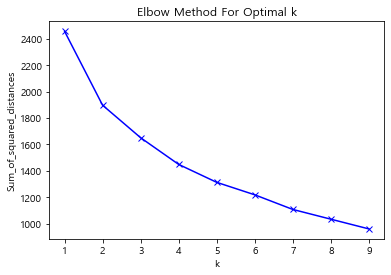

In [18]:
SSD = []
n = 10

for k in range(1,n):
    km = KMeans(n_clusters = k)
    km = km.fit(scale_df)
    SSD.append(km.inertia_)
    
plt.plot(range(1,n), SSD, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [19]:
k = 3
km = KMeans(n_clusters = k, algorithm = 'auto')
km.fit(cluster_car_jg.drop(['road_name', 'link_id'],axis=1)) 
cluster_car_jg['cluster'] = km.predict(cluster_car_jg.drop(['road_name', 'link_id'],axis=1))

In [20]:
print(cluster_car_jg.cluster.value_counts())
pd.DataFrame(cluster_car_jg.groupby(['cluster'])['speed_limit', 'road_length', 'signal',
       'signal_length'].mean())

1    130
0     67
2      8
Name: cluster, dtype: int64


,speed_limit,road_length,signal,signal_length
cluster,,,,
0,46.417910,602.791045,37.880597,0.065231
1,48.307692,268.815385,32.030769,0.125789
2,43.750000,1482.625000,27.375000,0.021317


In [19]:
k = 4
km = KMeans(n_clusters = k, algorithm = 'auto')
km.fit(cluster_car_jg.drop(['road_name', 'link_id'],axis=1)) 
cluster_car_jg['cluster'] = km.predict(cluster_car_jg.drop(['road_name', 'link_id'],axis=1))

print(cluster_car_jg.cluster.value_counts())
pd.DataFrame(cluster_car_jg.groupby(['cluster'])['speed_limit', 'road_length', 'signal',
       'signal_length'].mean())

2    113
0     76
1     13
3      3
Name: cluster, dtype: int64


,speed_limit,road_length,signal,signal_length
cluster,,,,
0,47.368421,531.578947,37.328947,0.072541
1,44.615385,997.153846,38.230769,0.038868
2,47.964602,247.265487,31.398230,0.131470
3,46.666667,1963.333333,13.000000,0.006357


### 중구 k=3으로 결정

In [42]:
np.random.seed(333)

k = 3
km = KMeans(n_clusters = k, algorithm = 'auto')
km.fit(cluster_car_jg.drop(['road_name', 'link_id'],axis=1)) 
cluster_car_jg['cluster'] = km.predict(cluster_car_jg.drop(['road_name', 'link_id'],axis=1))

print(cluster_car_jg.cluster.value_counts())
pd.DataFrame(cluster_car_jg.groupby(['cluster'])['speed_limit', 'road_length', 'signal',
       'signal_length','urban_suburb'].mean())

1    131
0     66
2      8
Name: cluster, dtype: int64


,speed_limit,road_length,signal,signal_length,urban_suburb
cluster,,,,,
0,46.515152,605.303030,38.181818,0.065595,0.636364
1,48.244275,270.099237,31.923664,0.125143,0.511450
2,43.750000,1482.625000,27.375000,0.021317,1.000000


In [43]:
pd.DataFrame(cluster_car_jg.groupby(['cluster'])['road_type'].value_counts(normalize=True)).unstack()

road_type                    
road_type         0         1         2
cluster                                
0          0.075758  0.227273  0.696970
1          0.091603  0.282443  0.625954
2          0.125000  0.625000  0.250000

In [23]:
pd.DataFrame(cluster_car_jg.groupby(['cluster'])['road_type'].value_counts()).unstack()

road_type        
road_type         0   1   2
cluster                    
0                 5  15  46
1                12  37  82
2                 1   5   2

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [21]:
cluster_car_jg.head(10)

,link_id,road_name,direction,road_length,road_num,road_type,urban_suburb,cctv,kids,speed_limit,entrance,signal,signal_length,entrance_length,cluster
826,1010006200,금호로,0,660,1.0,1,1,1.0,0.0,40.0,37.0,52.0,0.078788,0.056061,0
827,1010006100,금호로,1,674,1.0,1,1,1.0,0.0,40.0,37.0,52.0,0.077151,0.054896,0
828,1030014900,금호로,1,1083,2.0,1,1,2.0,0.0,40.0,37.0,52.0,0.048015,0.034164,2
829,1010016900,남대문로,0,313,5.0,1,0,1.0,0.0,60.0,14.0,10.0,0.031949,0.044728,1
830,1010011300,남대문로,0,270,4.0,1,0,1.0,0.0,60.0,14.0,10.0,0.037037,0.051852,1
831,1010007100,남대문로,0,205,5.0,1,0,0.0,0.0,60.0,14.0,10.0,0.048780,0.068293,1
832,1010005100,남대문로,0,533,3.0,1,0,1.0,0.0,60.0,14.0,10.0,0.018762,0.026266,0
833,1010005200,남대문로,1,544,4.0,1,0,1.0,0.0,60.0,14.0,10.0,0.018382,0.025735,0
834,1010007200,남대문로,1,208,4.0,1,0,0.0,0.0,60.0,14.0,10.0,0.048077,0.067308,1
835,1010011400,남대문로,1,271,4.0,1,0,1.0,0.0,60.0,14.0,10.0,0.036900,0.051661,1


### car_df1에 cluster_car_jg['cluster'] 합치기

In [25]:
cluster_car_jg = cluster_car_jg[['link_id','cluster']]

In [26]:
cluster_car_jg.head()

,link_id,cluster
826,1010006200,0
827,1010006100,0
828,1030014900,2
829,1010016900,1
830,1010011300,1


In [27]:
car_df1 = pd.merge(car_df1, cluster_car_jg, on='link_id', how='inner')

In [28]:
car_df1.head()

,date,days,road_name,link_id,start_point,end_point,direction,road_length,road_num,road_type,urban_suburb,district,time,y,cctv,kids,speed_limit,entrance,signal,d1,d2,d3,d4,victims,severity,accident_count,inter_num,temperature,wind,rain,snow,holiday,special,vacation,SO2,CO,O3,NO2,PM10,PM2.5,dust_PM10_level,dust_PM2_level,rain_level,wind_level,O3_level,temp_level,weekend,month,cluster
0,20180101,월,금호로,1010006200,청구역,광희문,0,660,1.0,1,1,중구,10,26.75,1.0,0.0,40.0,37.0,52.0,1.0,10.0,20.0,6.0,37.0,108.0,28.0,5.0,-2.2,1.6,0.0,0.0,1,0,0,0.004,0.4,0.018,0.024,25.0,12.0,0,0,0,0,0,1,0,1,0
1,20180101,월,금호로,1010006200,청구역,광희문,0,660,1.0,1,1,중구,11,24.29,1.0,0.0,40.0,37.0,52.0,1.0,10.0,20.0,6.0,37.0,108.0,28.0,5.0,-0.9,1.7,0.0,0.0,1,0,0,0.005,0.5,0.020,0.023,31.0,16.0,1,1,0,0,0,1,0,1,0
2,20180101,월,금호로,1010006200,청구역,광희문,0,660,1.0,1,1,중구,12,20.60,1.0,0.0,40.0,37.0,52.0,1.0,10.0,20.0,6.0,37.0,108.0,28.0,5.0,0.4,1.3,0.0,0.0,1,0,0,0.004,0.5,0.025,0.018,30.0,17.0,0,1,0,0,0,1,0,1,0
3,20180101,월,금호로,1010006200,청구역,광희문,0,660,1.0,1,1,중구,13,22.11,1.0,0.0,40.0,37.0,52.0,1.0,10.0,20.0,6.0,37.0,108.0,28.0,5.0,0.5,1.3,0.0,0.0,1,0,0,0.004,0.4,0.030,0.011,24.0,13.0,0,0,0,0,0,1,0,1,0
4,20180101,월,금호로,1010006200,청구역,광희문,0,660,1.0,1,1,중구,14,18.70,1.0,0.0,40.0,37.0,52.0,1.0,10.0,20.0,6.0,37.0,108.0,28.0,5.0,1.0,1.9,0.0,0.0,1,0,0,0.004,0.5,0.025,0.018,31.0,17.0,1,1,0,0,0,1,0,1,0


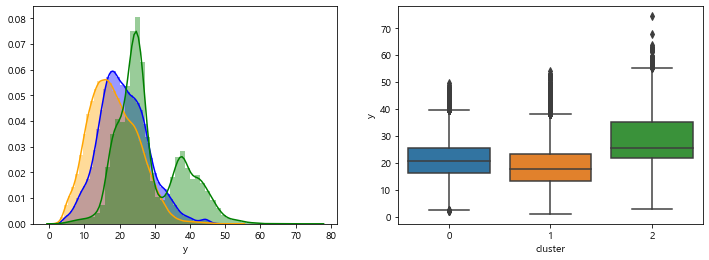

In [35]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(car_df1[car_df1.cluster == 0]["y"], color="blue")
sns.distplot(car_df1[car_df1.cluster == 1]["y"], color="orange")
sns.distplot(car_df1[car_df1.cluster == 2]["y"], color="green")
plt.subplot(1,2,2)
sns.boxplot(car_df1.cluster, car_df1.y)

## 나머지 변수 추가 & 라벨 인코딩하기

In [26]:
car_df1.dtypes

date                  int64
days                 object
road_name            object
link_id               int64
start_point          object
end_point            object
direction             int32
road_length           int64
road_num            float64
road_type             int32
urban_suburb          int32
district             object
time                  int64
y                   float64
cctv                float64
kids                float64
speed_limit         float64
entrance            float64
signal              float64
d1                  float64
d2                  float64
d3                  float64
d4                  float64
victims             float64
severity            float64
accident_count      float64
inter_num           float64
temperature         float64
wind                float64
rain                float64
snow                float64
holiday               int64
special               int64
vacation              int64
SO2                 float64
CO                  

In [27]:
car_df1['hsv'] = car_df1['holiday'] + car_df1['special'] + car_df1['vacation']
car_df1['cctv_kids'] = car_df1['cctv'] + car_df1['kids']

car_df1['cctv_length'] = car_df1['cctv'] / car_df1['road_length']
car_df1['kids_length'] = car_df1['kids'] / car_df1['road_length']
car_df1['entrance_length'] = car_df1['entrance'] / car_df1['road_length']
car_df1['signal_length'] = car_df1['signal'] / car_df1['road_length']

car_df1['cctv_num'] = car_df1['cctv'] / car_df1['inter_num']
car_df1['kids_num'] = car_df1['kids'] / car_df1['inter_num']
car_df1['entrance_num'] = car_df1['entrance'] / car_df1['inter_num']
car_df1['signal_num'] = car_df1['signal'] / car_df1['inter_num']

bins = [0,500,1000,1500,2000,4000]
bins_names = [0,1,2,3,4] # 구간별 이름
car_df1['severity_level'] = pd.cut(car_df1['severity'], bins, labels=bins_names)

bins = [-40,-10,10,20,30,50]
bins_names = [0,1,2,3,4] # 구간별 이름
car_df1['temp_level'] = pd.cut(car_df1['temperature'], bins, labels=bins_names)

In [28]:
#for col in cols :
#    car_df1[col + '_length'] = car_df1[col] / car_df1['road_length']
#    car_df1[col + '_num'] = car_df1[col] / car_df1['inter_num']
    
#df['month'] = df['date'].apply(lambda x : int(str(x)[4:6]))  

def seasonal(month) :
    if (month <= 5) & (month >= 3):
        return 0
    elif (month >= 6) & (month >= 8):
        return 1
    elif (month >= 9) & (month >= 11):
        return 2
    else :
        return 3
car_df1['season'] = car_df1['month'].apply(lambda x : seasonal(x))

In [29]:
car_df1.dtypes

date                  int64
days                 object
road_name            object
link_id               int64
start_point          object
end_point            object
direction             int32
road_length           int64
road_num            float64
road_type             int32
urban_suburb          int32
district             object
time                  int64
y                   float64
cctv                float64
kids                float64
speed_limit         float64
entrance            float64
signal              float64
d1                  float64
d2                  float64
d3                  float64
d4                  float64
victims             float64
severity            float64
accident_count      float64
inter_num           float64
temperature         float64
wind                float64
rain                float64
                     ...   
holiday               int64
special               int64
vacation              int64
SO2                 float64
CO                  

In [30]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
car_df1["days"] = lb_make.fit_transform(car_df1["days"])
car_df1["direction"] = lb_make.fit_transform(car_df1["direction"])
car_df1["road_type"] = lb_make.fit_transform(car_df1["road_type"])
car_df1["urban_suburb"] = lb_make.fit_transform(car_df1["urban_suburb"])
car_df1["district"] = lb_make.fit_transform(car_df1["district"])
car_df1["time"] = lb_make.fit_transform(car_df1["time"])
car_df1["temp_level"] = lb_make.fit_transform(car_df1["temp_level"])
car_df1["severity_level"] = lb_make.fit_transform(car_df1["severity_level"])

In [31]:
cols = ['month']

car_df1_dummy = pd.get_dummies(car_df1, columns=cols)
car_df1 = pd.concat([car_df1_dummy, car_df1[cols]], axis = 1)

# train : test = 7:3으로 나누기

In [32]:
car_df1.head(2)

,date,days,road_name,link_id,start_point,end_point,direction,road_length,road_num,road_type,urban_suburb,district,time,y,cctv,kids,speed_limit,entrance,signal,d1,d2,d3,d4,victims,severity,accident_count,inter_num,temperature,wind,rain,snow,holiday,special,vacation,SO2,CO,O3,NO2,PM10,PM2.5,dust_PM10_level,dust_PM2_level,rain_level,wind_level,O3_level,temp_level,weekend,cluster,hsv,cctv_kids,cctv_length,kids_length,entrance_length,signal_length,cctv_num,kids_num,entrance_num,signal_num,severity_level,season,month_1,month_2,month_3,month_4,month_5,month_6,month_8,month_9,month_10,month_11,month_12,month
0,20180101,3,금호로,1010006200,청구역,광희문,0,660,1.0,1,1,0,0,26.75,1.0,0.0,40.0,37.0,52.0,1.0,10.0,20.0,6.0,37.0,108.0,28.0,5.0,-2.2,1.6,0.0,0.0,1,0,0,0.004,0.4,0.018,0.024,25.0,12.0,0,0,0,0,0,1,0,0,1,1.0,0.001515,0.0,0.056061,0.078788,0.2,0.0,7.4,10.4,0,3,1,0,0,0,0,0,0,0,0,0,0,1
1,20180101,3,금호로,1010006200,청구역,광희문,0,660,1.0,1,1,0,1,24.29,1.0,0.0,40.0,37.0,52.0,1.0,10.0,20.0,6.0,37.0,108.0,28.0,5.0,-0.9,1.7,0.0,0.0,1,0,0,0.005,0.5,0.020,0.023,31.0,16.0,1,1,0,0,0,1,0,0,1,1.0,0.001515,0.0,0.056061,0.078788,0.2,0.0,7.4,10.4,0,3,1,0,0,0,0,0,0,0,0,0,0,1


In [33]:
car_df1.drop(['district'],axis=1,inplace=True)

In [34]:
car_df1.dtypes

date                 int64
days                 int32
road_name           object
link_id              int64
start_point         object
end_point           object
direction            int64
road_length          int64
road_num           float64
road_type            int64
urban_suburb         int64
time                 int64
y                  float64
cctv               float64
kids               float64
speed_limit        float64
entrance           float64
signal             float64
d1                 float64
d2                 float64
d3                 float64
d4                 float64
victims            float64
severity           float64
accident_count     float64
inter_num          float64
temperature        float64
wind               float64
rain               float64
snow               float64
                    ...   
rain_level           int64
wind_level           int64
O3_level             int64
temp_level           int64
weekend              int64
cluster              int32
h

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(car_df1.drop(['date','road_name','link_id','start_point','end_point','cluster','y'],axis = 1), car_df1['y'], test_size=0.3, random_state=333)

In [55]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [56]:
from sklearn.metrics import mean_squared_error

def rmse(y_true, y_pred) : 
    return np.sqrt(mean_squared_error(y_true, y_pred))

def model_cv_test(model, train_X, train_y, test_X, test_y, is_log) :

    train_rmse = []
    valid_rmse = []
    
    print('##### {} #####'.format(model.__class__.__name__))
        
    for i, (train_idx, val_idx) in enumerate(kf.split(train_X)):
        X_train, X_val = train_X.iloc[train_idx, :], train_X.iloc[val_idx, :]
        y_train, y_val = train_y[train_idx], train_y[val_idx]

        model.fit(X_train, y_train)
        
        if is_log :
            y_train = np.expm1(y_train)
            y_val = np.expm1(y_val)
            pred_train = np.expm1(model.predict(X_train))
            pred_valid = np.expm1(model.predict(X_val))
        else :
            pred_train = model.predict(X_train)
            pred_valid = model.predict(X_val)

        print('{0} fold train rmse : {1:.3f} valid rmse : {2:.3f}'.format(i, rmse(y_train, pred_train), rmse(y_val, pred_valid)))
        
        train_rmse.append(rmse(y_train, pred_train))
        valid_rmse.append(rmse(y_val, pred_valid))

    print('\n')    
    print('mean train rmse : {0:.3f} mean valid rmse : {1:.3f}'.format(np.mean(train_rmse), np.mean(valid_rmse)))

    
    model.fit(train_X, train_y)
    
    if is_log :
        test_y = np.expm1(test_y)
        pred_test = np.expm1(model.predict(test_X))
    else :
        pred_test = model.predict(test_X)
    
    print('test rmse {0:.3f} '.format(rmse(test_y, pred_test)))
    
from sklearn.model_selection import KFold
kf = KFold(n_splits = 3, random_state = 333)

# 전체모델링

In [57]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
lr = LinearRegression()

In [58]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

sc.fit(X_train)
X_train_sc = pd.DataFrame(sc.transform(X_train))
X_test_sc = pd.DataFrame(sc.transform(X_test))

In [59]:
model_cv_test(lr, X_train, y_train, X_test, y_test, False)

##### LinearRegression #####
0 fold train rmse : 6.121 valid rmse : 6.102
1 fold train rmse : 6.112 valid rmse : 6.119
2 fold train rmse : 6.110 valid rmse : 6.124


mean train rmse : 6.114 mean valid rmse : 6.115
test rmse 6.112 


In [41]:
ridge = Ridge()
model_cv_test(ridge, X_train_sc, y_train, X_test_sc, y_test, False)

##### Ridge #####
0 fold train rmse : 6.118 valid rmse : 6.100
1 fold train rmse : 6.110 valid rmse : 6.117
2 fold train rmse : 6.107 valid rmse : 6.122


mean train rmse : 6.112 mean valid rmse : 6.113
test rmse 6.109 


In [60]:
lasso = Lasso()
model_cv_test(lasso, X_train_sc, y_train, X_test_sc, y_test, False)

##### Lasso #####
0 fold train rmse : 6.901 valid rmse : 6.883
1 fold train rmse : 6.892 valid rmse : 6.891
2 fold train rmse : 6.887 valid rmse : 6.907


mean train rmse : 6.894 mean valid rmse : 6.894
test rmse 6.888 


In [61]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_jobs = -1)
#model_cv_test(rf, X_train, y_train, X_test, y_test, False)

In [62]:
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [77]:
model_cv_test(rf, X_train_sc, y_train, X_test_sc, y_test, False)

##### RandomForestRegressor #####
0 fold train rmse : 1.013 valid rmse : 2.380
1 fold train rmse : 1.012 valid rmse : 2.403
2 fold train rmse : 1.012 valid rmse : 2.395


mean train rmse : 1.012 mean valid rmse : 2.393
test rmse 2.309 


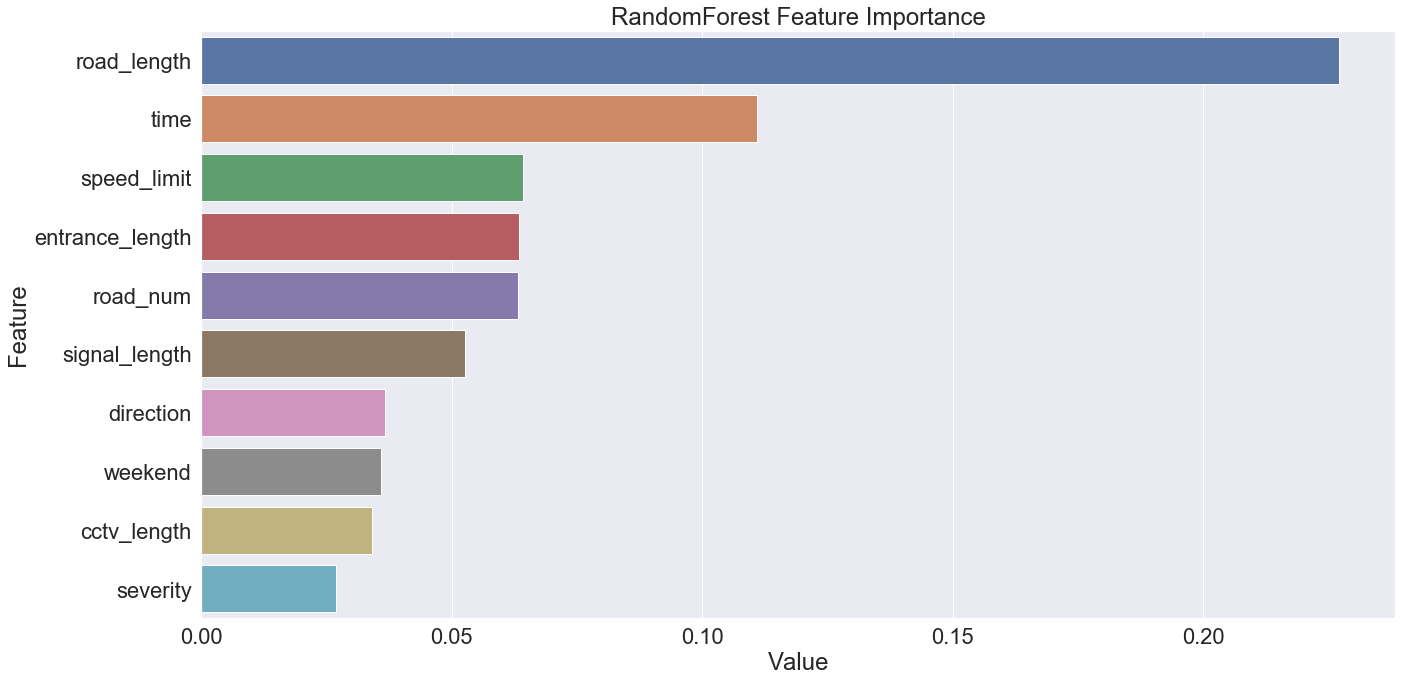

In [63]:
feature_imp = pd.DataFrame(sorted(zip(rf.feature_importances_, X_train.columns)), columns=['Value','Feature'])

sns.set(font_scale=2)
plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[:10])
plt.title('RandomForest Feature Importance')
plt.tight_layout()
plt.show()

In [64]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

import warnings
warnings.filterwarnings('ignore')

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from numpy import *
from math import sqrt

In [66]:
def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    if is_expm1 :
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    mse = mean_squared_error(y_test, pred) 
    rmse = sqrt(mse)
    r2 = r2_score(y_test, pred)
    
    
    print('###',model.__class__.__name__,'###')
    print('MSE: {0:.3f}, RMSE: {1:.3f}, R2: {2:.3F}'.format(mse, rmse, r2*100))

In [67]:
xgb = XGBRegressor(n_jobs = -1)
lgb = LGBMRegressor(n_jobs = -1)

In [68]:
get_model_predict(xgb, X_train, X_test, y_train, y_test)

### XGBRegressor ###
MSE: 21.800, RMSE: 4.669, R2: 59.362


In [69]:
get_model_predict(lgb, X_train, X_test, y_train, y_test)

### LGBMRegressor ###
MSE: 10.510, RMSE: 3.242, R2: 80.408


In [78]:
model_cv_test(xgb, X_train_sc, y_train, X_test_sc, y_test, False)

##### XGBRegressor #####
0 fold train rmse : 4.700 valid rmse : 4.684
1 fold train rmse : 4.677 valid rmse : 4.687
2 fold train rmse : 4.702 valid rmse : 4.713


mean train rmse : 4.693 mean valid rmse : 4.694
test rmse 4.669 


In [79]:
model_cv_test(lgb, X_train_sc, y_train, X_test_sc, y_test, False)

##### LGBMRegressor #####
0 fold train rmse : 3.229 valid rmse : 3.212
1 fold train rmse : 3.209 valid rmse : 3.228
2 fold train rmse : 3.204 valid rmse : 3.224


mean train rmse : 3.214 mean valid rmse : 3.221
test rmse 3.237 


## 전체 모델은 randomForest 선택

# cluster별로 모델링하기

In [70]:
car_df1_cluster0 = car_df1[car_df1['cluster'].isin([0])]
car_df1_cluster1 = car_df1[car_df1['cluster'].isin([1])]
car_df1_cluster2 = car_df1[car_df1['cluster'].isin([2])]

In [71]:
car_df1_cluster0.head()

,date,days,road_name,link_id,start_point,end_point,direction,road_length,road_num,road_type,urban_suburb,time,y,cctv,kids,speed_limit,entrance,signal,d1,d2,d3,d4,victims,severity,accident_count,inter_num,temperature,wind,rain,snow,holiday,special,vacation,SO2,CO,O3,NO2,PM10,PM2.5,dust_PM10_level,dust_PM2_level,rain_level,wind_level,O3_level,temp_level,weekend,cluster,hsv,cctv_kids,cctv_length,kids_length,entrance_length,signal_length,cctv_num,kids_num,entrance_num,signal_num,severity_level,season,month_1,month_2,month_3,month_4,month_5,month_6,month_8,month_9,month_10,month_11,month_12,month
0,20180101,3,금호로,1010006200,청구역,광희문,0,660,1.0,1,1,0,26.75,1.0,0.0,40.0,37.0,52.0,1.0,10.0,20.0,6.0,37.0,108.0,28.0,5.0,-2.2,1.6,0.0,0.0,1,0,0,0.004,0.4,0.018,0.024,25.0,12.0,0,0,0,0,0,1,0,0,1,1.0,0.001515,0.0,0.056061,0.078788,0.2,0.0,7.4,10.4,0,3,1,0,0,0,0,0,0,0,0,0,0,1
1,20180101,3,금호로,1010006200,청구역,광희문,0,660,1.0,1,1,1,24.29,1.0,0.0,40.0,37.0,52.0,1.0,10.0,20.0,6.0,37.0,108.0,28.0,5.0,-0.9,1.7,0.0,0.0,1,0,0,0.005,0.5,0.020,0.023,31.0,16.0,1,1,0,0,0,1,0,0,1,1.0,0.001515,0.0,0.056061,0.078788,0.2,0.0,7.4,10.4,0,3,1,0,0,0,0,0,0,0,0,0,0,1
2,20180101,3,금호로,1010006200,청구역,광희문,0,660,1.0,1,1,2,20.60,1.0,0.0,40.0,37.0,52.0,1.0,10.0,20.0,6.0,37.0,108.0,28.0,5.0,0.4,1.3,0.0,0.0,1,0,0,0.004,0.5,0.025,0.018,30.0,17.0,0,1,0,0,0,1,0,0,1,1.0,0.001515,0.0,0.056061,0.078788,0.2,0.0,7.4,10.4,0,3,1,0,0,0,0,0,0,0,0,0,0,1
3,20180101,3,금호로,1010006200,청구역,광희문,0,660,1.0,1,1,3,22.11,1.0,0.0,40.0,37.0,52.0,1.0,10.0,20.0,6.0,37.0,108.0,28.0,5.0,0.5,1.3,0.0,0.0,1,0,0,0.004,0.4,0.030,0.011,24.0,13.0,0,0,0,0,0,1,0,0,1,1.0,0.001515,0.0,0.056061,0.078788,0.2,0.0,7.4,10.4,0,3,1,0,0,0,0,0,0,0,0,0,0,1
4,20180101,3,금호로,1010006200,청구역,광희문,0,660,1.0,1,1,4,18.70,1.0,0.0,40.0,37.0,52.0,1.0,10.0,20.0,6.0,37.0,108.0,28.0,5.0,1.0,1.9,0.0,0.0,1,0,0,0.004,0.5,0.025,0.018,31.0,17.0,1,1,0,0,0,1,0,0,1,1.0,0.001515,0.0,0.056061,0.078788,0.2,0.0,7.4,10.4,0,3,1,0,0,0,0,0,0,0,0,0,0,1


In [72]:
car_df1_cluster1.head()

,date,days,road_name,link_id,start_point,end_point,direction,road_length,road_num,road_type,urban_suburb,time,y,cctv,kids,speed_limit,entrance,signal,d1,d2,d3,d4,victims,severity,accident_count,inter_num,temperature,wind,rain,snow,holiday,special,vacation,SO2,CO,O3,NO2,PM10,PM2.5,dust_PM10_level,dust_PM2_level,rain_level,wind_level,O3_level,temp_level,weekend,cluster,hsv,cctv_kids,cctv_length,kids_length,entrance_length,signal_length,cctv_num,kids_num,entrance_num,signal_num,severity_level,season,month_1,month_2,month_3,month_4,month_5,month_6,month_8,month_9,month_10,month_11,month_12,month
13734,20180101,3,남대문로,1010016900,광교,을지로1가,0,313,5.0,1,0,0,20.50,1.0,0.0,60.0,14.0,10.0,0.0,14.0,34.0,13.0,61.0,157.0,42.0,4.0,-2.2,1.6,0.0,0.0,1,0,0,0.004,0.4,0.018,0.024,25.0,12.0,0,0,0,0,0,1,0,1,1,1.0,0.003195,0.0,0.044728,0.031949,0.25,0.0,3.5,2.5,0,3,1,0,0,0,0,0,0,0,0,0,0,1
13735,20180101,3,남대문로,1010016900,광교,을지로1가,0,313,5.0,1,0,1,22.54,1.0,0.0,60.0,14.0,10.0,0.0,14.0,34.0,13.0,61.0,157.0,42.0,4.0,-0.9,1.7,0.0,0.0,1,0,0,0.005,0.5,0.020,0.023,31.0,16.0,1,1,0,0,0,1,0,1,1,1.0,0.003195,0.0,0.044728,0.031949,0.25,0.0,3.5,2.5,0,3,1,0,0,0,0,0,0,0,0,0,0,1
13736,20180101,3,남대문로,1010016900,광교,을지로1가,0,313,5.0,1,0,2,22.18,1.0,0.0,60.0,14.0,10.0,0.0,14.0,34.0,13.0,61.0,157.0,42.0,4.0,0.4,1.3,0.0,0.0,1,0,0,0.004,0.5,0.025,0.018,30.0,17.0,0,1,0,0,0,1,0,1,1,1.0,0.003195,0.0,0.044728,0.031949,0.25,0.0,3.5,2.5,0,3,1,0,0,0,0,0,0,0,0,0,0,1
13737,20180101,3,남대문로,1010016900,광교,을지로1가,0,313,5.0,1,0,3,23.48,1.0,0.0,60.0,14.0,10.0,0.0,14.0,34.0,13.0,61.0,157.0,42.0,4.0,0.5,1.3,0.0,0.0,1,0,0,0.004,0.4,0.030,0.011,24.0,13.0,0,0,0,0,0,1,0,1,1,1.0,0.003195,0.0,0.044728,0.031949,0.25,0.0,3.5,2.5,0,3,1,0,0,0,0,0,0,0,0,0,0,1
13738,20180101,3,남대문로,1010016900,광교,을지로1가,0,313,5.0,1,0,4,23.16,1.0,0.0,60.0,14.0,10.0,0.0,14.0,34.0,13.0,61.0,157.0,42.0,4.0,1.0,1.9,0.0,0.0,1,0,0,0.004,0.5,0.025,0.018,31.0,17.0,1,1,0,0,0,1,0,1,1,1.0,0.003195,0.0,0.044728,0.031949,0.25,0.0,3.5,2.5,0,3,1,0,0,0,0,0,0,0,0,0,0,1


In [73]:
car_df1_cluster2.head()

,date,days,road_name,link_id,start_point,end_point,direction,road_length,road_num,road_type,urban_suburb,time,y,cctv,kids,speed_limit,entrance,signal,d1,d2,d3,d4,victims,severity,accident_count,inter_num,temperature,wind,rain,snow,holiday,special,vacation,SO2,CO,O3,NO2,PM10,PM2.5,dust_PM10_level,dust_PM2_level,rain_level,wind_level,O3_level,temp_level,weekend,cluster,hsv,cctv_kids,cctv_length,kids_length,entrance_length,signal_length,cctv_num,kids_num,entrance_num,signal_num,severity_level,season,month_1,month_2,month_3,month_4,month_5,month_6,month_8,month_9,month_10,month_11,month_12,month
9098,20180101,3,금호로,1030014900,청구역,신금호역,1,1083,2.0,1,1,0,22.09,2.0,0.0,40.0,37.0,52.0,1.0,10.0,20.0,6.0,37.0,108.0,28.0,5.0,-2.2,1.6,0.0,0.0,1,0,0,0.004,0.4,0.018,0.024,25.0,12.0,0,0,0,0,0,1,0,2,1,2.0,0.001847,0.0,0.034164,0.048015,0.4,0.0,7.4,10.4,0,3,1,0,0,0,0,0,0,0,0,0,0,1
9099,20180101,3,금호로,1030014900,청구역,신금호역,1,1083,2.0,1,1,1,21.18,2.0,0.0,40.0,37.0,52.0,1.0,10.0,20.0,6.0,37.0,108.0,28.0,5.0,-0.9,1.7,0.0,0.0,1,0,0,0.005,0.5,0.020,0.023,31.0,16.0,1,1,0,0,0,1,0,2,1,2.0,0.001847,0.0,0.034164,0.048015,0.4,0.0,7.4,10.4,0,3,1,0,0,0,0,0,0,0,0,0,0,1
9100,20180101,3,금호로,1030014900,청구역,신금호역,1,1083,2.0,1,1,2,20.84,2.0,0.0,40.0,37.0,52.0,1.0,10.0,20.0,6.0,37.0,108.0,28.0,5.0,0.4,1.3,0.0,0.0,1,0,0,0.004,0.5,0.025,0.018,30.0,17.0,0,1,0,0,0,1,0,2,1,2.0,0.001847,0.0,0.034164,0.048015,0.4,0.0,7.4,10.4,0,3,1,0,0,0,0,0,0,0,0,0,0,1
9101,20180101,3,금호로,1030014900,청구역,신금호역,1,1083,2.0,1,1,3,17.09,2.0,0.0,40.0,37.0,52.0,1.0,10.0,20.0,6.0,37.0,108.0,28.0,5.0,0.5,1.3,0.0,0.0,1,0,0,0.004,0.4,0.030,0.011,24.0,13.0,0,0,0,0,0,1,0,2,1,2.0,0.001847,0.0,0.034164,0.048015,0.4,0.0,7.4,10.4,0,3,1,0,0,0,0,0,0,0,0,0,0,1
9102,20180101,3,금호로,1030014900,청구역,신금호역,1,1083,2.0,1,1,4,17.56,2.0,0.0,40.0,37.0,52.0,1.0,10.0,20.0,6.0,37.0,108.0,28.0,5.0,1.0,1.9,0.0,0.0,1,0,0,0.004,0.5,0.025,0.018,31.0,17.0,1,1,0,0,0,1,0,2,1,2.0,0.001847,0.0,0.034164,0.048015,0.4,0.0,7.4,10.4,0,3,1,0,0,0,0,0,0,0,0,0,0,1


In [74]:
car_df1_cluster0.reset_index(drop=True)
car_df1_cluster1.reset_index(drop=True)
car_df1_cluster2.reset_index(drop=True)

,date,days,road_name,link_id,start_point,end_point,direction,road_length,road_num,road_type,urban_suburb,time,y,cctv,kids,speed_limit,entrance,signal,d1,d2,d3,d4,victims,severity,accident_count,inter_num,temperature,wind,rain,snow,holiday,special,vacation,SO2,CO,O3,NO2,PM10,PM2.5,dust_PM10_level,dust_PM2_level,rain_level,wind_level,O3_level,temp_level,weekend,cluster,hsv,cctv_kids,cctv_length,kids_length,entrance_length,signal_length,cctv_num,kids_num,entrance_num,signal_num,severity_level,season,month_1,month_2,month_3,month_4,month_5,month_6,month_8,month_9,month_10,month_11,month_12,month
0,20180101,3,금호로,1030014900,청구역,신금호역,1,1083,2.0,1,1,0,22.09,2.0,0.0,40.0,37.0,52.0,1.0,10.0,20.0,6.0,37.0,108.0,28.0,5.0,-2.2,1.6,0.0,0.0,1,0,0,0.004,0.4,0.018,0.024,25.0,12.0,0,0,0,0,0,1,0,2,1,2.0,0.001847,0.0,0.034164,0.048015,0.4,0.0,7.400000,10.400000,0,3,1,0,0,0,0,0,0,0,0,0,0,1
1,20180101,3,금호로,1030014900,청구역,신금호역,1,1083,2.0,1,1,1,21.18,2.0,0.0,40.0,37.0,52.0,1.0,10.0,20.0,6.0,37.0,108.0,28.0,5.0,-0.9,1.7,0.0,0.0,1,0,0,0.005,0.5,0.020,0.023,31.0,16.0,1,1,0,0,0,1,0,2,1,2.0,0.001847,0.0,0.034164,0.048015,0.4,0.0,7.400000,10.400000,0,3,1,0,0,0,0,0,0,0,0,0,0,1
2,20180101,3,금호로,1030014900,청구역,신금호역,1,1083,2.0,1,1,2,20.84,2.0,0.0,40.0,37.0,52.0,1.0,10.0,20.0,6.0,37.0,108.0,28.0,5.0,0.4,1.3,0.0,0.0,1,0,0,0.004,0.5,0.025,0.018,30.0,17.0,0,1,0,0,0,1,0,2,1,2.0,0.001847,0.0,0.034164,0.048015,0.4,0.0,7.400000,10.400000,0,3,1,0,0,0,0,0,0,0,0,0,0,1
3,20180101,3,금호로,1030014900,청구역,신금호역,1,1083,2.0,1,1,3,17.09,2.0,0.0,40.0,37.0,52.0,1.0,10.0,20.0,6.0,37.0,108.0,28.0,5.0,0.5,1.3,0.0,0.0,1,0,0,0.004,0.4,0.030,0.011,24.0,13.0,0,0,0,0,0,1,0,2,1,2.0,0.001847,0.0,0.034164,0.048015,0.4,0.0,7.400000,10.400000,0,3,1,0,0,0,0,0,0,0,0,0,0,1
4,20180101,3,금호로,1030014900,청구역,신금호역,1,1083,2.0,1,1,4,17.56,2.0,0.0,40.0,37.0,52.0,1.0,10.0,20.0,6.0,37.0,108.0,28.0,5.0,1.0,1.9,0.0,0.0,1,0,0,0.004,0.5,0.025,0.018,31.0,17.0,1,1,0,0,0,1,0,2,1,2.0,0.001847,0.0,0.034164,0.048015,0.4,0.0,7.400000,10.400000,0,3,1,0,0,0,0,0,0,0,0,0,0,1
5,20180101,3,금호로,1030014900,청구역,신금호역,1,1083,2.0,1,1,5,19.09,2.0,0.0,40.0,37.0,52.0,1.0,10.0,20.0,6.0,37.0,108.0,28.0,5.0,1.8,2.0,0.0,0.0,1,0,0,0.005,0.5,0.028,0.017,41.0,23.0,1,1,0,0,0,1,0,2,1,2.0,0.001847,0.0,0.034164,0.048015,0.4,0.0,7.400000,10.400000,0,3,1,0,0,0,0,0,0,0,0,0,0,1
6,20180101,3,금호로,1030014900,청구역,신금호역,1,1083,2.0,1,1,6,18.92,2.0,0.0,40.0,37.0,52.0,1.0,10.0,20.0,6.0,37.0,108.0,28.0,5.0,0.9,2.3,0.0,0.0,1,0,0,0.005,0.5,0.026,0.019,42.0,21.0,1,1,0,0,0,1,0,2,1,2.0,0.001847,0.0,0.034164,0.048015,0.4,0.0,7.400000,10.400000,0,3,1,0,0,0,0,0,0,0,0,0,0,1
7,20180101,3,금호로,1030014900,청구역,신금호역,1,1083,2.0,1,1,7,21.02,2.0,0.0,40.0,37.0,52.0,1.0,10.0,20.0,6.0,37.0,108.0,28.0,5.0,0.2,3.2,0.0,0.0,1,0,0,0.006,0.5,0.026,0.019,40.0,21.0,1,1,0,0,0,1,0,2,1,2.0,0.001847,0.0,0.034164,0.048015,0.4,0.0,7.400000,10.400000,0,3,1,0,0,0,0,0,0,0,0,0,0,1
8,20180101,3,금호로,1030014900,청구역,신금호역,1,1083,2.0,1,1,8,21.36,2.0,0.0,40.0,37.0,52.0,1.0,10.0,20.0,6.0,37.0,108.0,28.0,5.0,-0.3,2.8,0.0,0.0,1,0,0,0.006,0.5,0.016,0.028,37.0,19.0,1,1,0,0,0,1,0,2,1,2.0,0.001847,0.0,0.034164,0.048015,0.4,0.0,7.400000,10.400000,0,3,1,0,0,0,0,0,0,0,0,0,0,1
9,20180101,3,금호로,1030014900,청구역,신금호역,1,1083,2.0,1,1,9,19.31,2.0,0.0,40.0,37.0,52.0,1.0,10.0,20.0,6.0,37.0,108.0,28.0,5.0,-0.7,1.3,0.0,0.0,1,0,0,0.008,0.6,0.009,0.037,39.0,22.0,1,1,0,0,0,1,0,2,1,2.0,0.001847,0.0,0.034164,0.048015,0.4,0.0,7.400000,10.400000,0,3,1,0,0,0,0,0,0,0,0,0,0,1


In [75]:
car_df1_cluster0.to_pickle("car_df1_cluster0.pkl")
car_df1_cluster1.to_pickle("car_df1_cluster1.pkl")
car_df1_cluster2.to_pickle("car_df1_cluster2.pkl")

In [76]:
car_df1.to_pickle("car_df1.pkl")

In [80]:
print(len(car_df1_cluster0['y']))
print(len(car_df1_cluster1['y']))
print(len(car_df1_cluster2['y']))

309926
611122
37032


In [81]:
car_df1_cluster0.to_csv("car_df1_cluster0.csv")
car_df1_cluster1.to_csv("car_df1_cluster1.csv")
car_df1_cluster2.to_csv("car_df1_cluster2.csv")

# EDA

In [3]:
import pandas as pd
car_df1 = pd.read_pickle('car_df1.pkl')

In [4]:
pd.set_option('display.max_columns', 500)
car_df1.head(5)

,date,days,road_name,link_id,start_point,end_point,direction,road_length,road_num,road_type,urban_suburb,time,y,cctv,kids,speed_limit,entrance,signal,d1,d2,d3,d4,victims,severity,accident_count,inter_num,temperature,wind,rain,snow,holiday,special,vacation,SO2,CO,O3,NO2,PM10,PM2.5,dust_PM10_level,dust_PM2_level,rain_level,wind_level,O3_level,temp_level,weekend,cluster,hsv,cctv_kids,cctv_length,kids_length,entrance_length,signal_length,cctv_num,kids_num,entrance_num,signal_num,severity_level,season,month_1,month_2,month_3,month_4,month_5,month_6,month_8,month_9,month_10,month_11,month_12,month
0,20180101,3,금호로,1010006200,청구역,광희문,0,660,1.0,1,1,0,26.75,1.0,0.0,40.0,37.0,52.0,1.0,10.0,20.0,6.0,37.0,108.0,28.0,5.0,-2.2,1.6,0.0,0.0,1,0,0,0.004,0.4,0.018,0.024,25.0,12.0,0,0,0,0,0,1,0,0,1,1.0,0.001515,0.0,0.056061,0.078788,0.2,0.0,7.4,10.4,0,3,1,0,0,0,0,0,0,0,0,0,0,1
1,20180101,3,금호로,1010006200,청구역,광희문,0,660,1.0,1,1,1,24.29,1.0,0.0,40.0,37.0,52.0,1.0,10.0,20.0,6.0,37.0,108.0,28.0,5.0,-0.9,1.7,0.0,0.0,1,0,0,0.005,0.5,0.020,0.023,31.0,16.0,1,1,0,0,0,1,0,0,1,1.0,0.001515,0.0,0.056061,0.078788,0.2,0.0,7.4,10.4,0,3,1,0,0,0,0,0,0,0,0,0,0,1
2,20180101,3,금호로,1010006200,청구역,광희문,0,660,1.0,1,1,2,20.60,1.0,0.0,40.0,37.0,52.0,1.0,10.0,20.0,6.0,37.0,108.0,28.0,5.0,0.4,1.3,0.0,0.0,1,0,0,0.004,0.5,0.025,0.018,30.0,17.0,0,1,0,0,0,1,0,0,1,1.0,0.001515,0.0,0.056061,0.078788,0.2,0.0,7.4,10.4,0,3,1,0,0,0,0,0,0,0,0,0,0,1
3,20180101,3,금호로,1010006200,청구역,광희문,0,660,1.0,1,1,3,22.11,1.0,0.0,40.0,37.0,52.0,1.0,10.0,20.0,6.0,37.0,108.0,28.0,5.0,0.5,1.3,0.0,0.0,1,0,0,0.004,0.4,0.030,0.011,24.0,13.0,0,0,0,0,0,1,0,0,1,1.0,0.001515,0.0,0.056061,0.078788,0.2,0.0,7.4,10.4,0,3,1,0,0,0,0,0,0,0,0,0,0,1
4,20180101,3,금호로,1010006200,청구역,광희문,0,660,1.0,1,1,4,18.70,1.0,0.0,40.0,37.0,52.0,1.0,10.0,20.0,6.0,37.0,108.0,28.0,5.0,1.0,1.9,0.0,0.0,1,0,0,0.004,0.5,0.025,0.018,31.0,17.0,1,1,0,0,0,1,0,0,1,1.0,0.001515,0.0,0.056061,0.078788,0.2,0.0,7.4,10.4,0,3,1,0,0,0,0,0,0,0,0,0,0,1


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [7]:
car_jg['y'].groupby(car_jg['time']).mean()

time
6     28.326064
7     27.283543
8     25.091517
9     22.915936
10    21.653129
11    20.887234
12    20.002542
13    19.515777
14    18.938053
15    18.129890
16    17.713329
17    17.665842
18    17.825301
19    17.954932
20    19.179830
21    20.878975
22    21.977009
23    22.864727
Name: y, dtype: float64

In [20]:
time_mean = car_jg.groupby(['time'])['y'].mean()
time_mean = pd.DataFrame({'time':time_mean.index,'y':list(time_mean)})
time_mean.head(20)

,time,y
0,6,28.326064
1,7,27.283543
2,8,25.091517
3,9,22.915936
4,10,21.653129
5,11,20.887234
6,12,20.002542
7,13,19.515777
8,14,18.938053
9,15,18.129890


In [21]:
time_mean.dtypes

time      int64
y       float64
dtype: object

In [22]:
import matplotlib as mpl
import matplotlib.pylab as plt

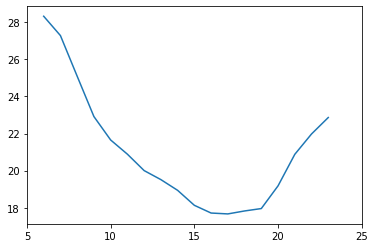

In [26]:
%matplotlib inline
plt.plot(time_mean['time'],time_mean['y'])
plt.xticks([5,10,15,20,25])
plt.show()

# 잠시 강남구

In [27]:
car_gn = pd.read_csv('car_gn.csv')

In [28]:
car_gn.head()

,date,days,road_name,link_id,start_point,end_point,direction,road_length,road_num,road_type,urban_suburb,district,time,value,cctv,kids,speed_limit,entrance,signal,d1,d2,d3,d4,victims,severity,accident_count,inter_num,temperature,wind,rain,snow,holiday,special,vacation,SO2,CO,O3,NO2,PM10,PM2.5
0,20180101,월,강남대로,1220021100,우성아파트,강남역,상행,586,5.0,주간선도로,외곽,강남구,6,26.95,0.0,0.0,60.0,82.0,54.0,3.0,69.0,338.0,28.0,438.0,1285.0,280.0,15.0,-1.7,0.9,0.0,0.0,1,0,0,0.006,0.7,0.004,0.04,32.0,25.0
1,20180101,월,강남대로,1220016200,우성아파트,뱅뱅사거리,하행,414,5.0,주간선도로,외곽,강남구,6,34.79,0.0,0.0,60.0,82.0,54.0,3.0,69.0,338.0,28.0,438.0,1285.0,280.0,15.0,-1.7,0.9,0.0,0.0,1,0,0,0.006,0.7,0.004,0.04,32.0,25.0
2,20180101,월,개포로,1220020500,대청초교,대청역,상행,862,2.0,기타도로,외곽,강남구,6,30.51,1.0,0.0,30.0,19.0,53.0,0.0,21.0,31.0,5.0,57.0,161.0,39.0,8.0,-1.7,0.9,0.0,0.0,1,0,0,0.006,0.7,0.004,0.04,32.0,25.0
3,20180101,월,개포로,1220018600,대청역,수서경찰서,상행,318,2.0,기타도로,외곽,강남구,6,26.00,0.0,0.0,30.0,19.0,53.0,0.0,21.0,31.0,5.0,57.0,161.0,39.0,8.0,-1.7,0.9,0.0,0.0,1,0,0,0.006,0.7,0.004,0.04,32.0,25.0
4,20180101,월,개포로,1220017200,수서경찰서,대모산입구역,상행,333,2.0,기타도로,외곽,강남구,6,35.89,0.0,1.0,30.0,19.0,53.0,0.0,21.0,31.0,5.0,57.0,161.0,39.0,8.0,-1.7,0.9,0.0,0.0,1,0,0,0.006,0.7,0.004,0.04,32.0,25.0


In [32]:
time_mean2 = car_gn.groupby(['time'])['value'].mean()
time_mean2 = pd.DataFrame({'time':time_mean2.index,'value':list(time_mean2)})
time_mean2.head(20)

,time,value
0,6,37.341073
1,7,35.118933
2,8,32.049138
3,9,29.328902
4,10,28.053411
5,11,27.091670
6,12,26.764052
7,13,27.274057
8,14,26.734714
9,15,25.481745


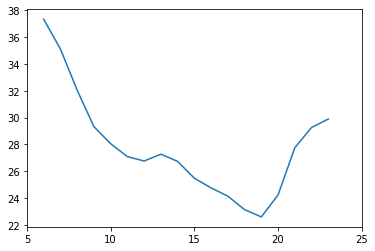

In [33]:
%matplotlib inline
plt.plot(time_mean2['time'],time_mean2['value'])
plt.xticks([5,10,15,20,25])
plt.show()